# Navigating Class Imbalance: Unveiling the Significance of CholCheck in Diabetes Analysis

An interesting case study showing how the same variable can appear both significant and insignificant in data analysis

In [ ]:
# @title Connecting to Google Drive
from pydrive2.auth import GoogleAuth
from pydrive2.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# @title Importing libraries
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import math

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error , accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
# @title Reading in the data
fid = '1ZifsmQ6sXWheH03X5zr8v0sORJ0V5CjP' # diabetes_binary_5050split_health...
f = drive.CreateFile({'id': fid})  # just open an existing file
f.FetchMetadata(fetch_all=True)
f.GetContentFile('og_diabetes.csv')
Original_diabetes = pd.read_csv("og_diabetes.csv" , sep = "," , encoding = 'utf-8')
diabetes1 = pd.read_csv("og_diabetes.csv" , sep = "," , encoding = 'utf-8')

fid = '1SszdwCctISWcvKwDfaTGhVJmr28iP-H6' # - Preprocessed diabetes
f = drive.CreateFile({'id': fid})  # just open an existing file
f.FetchMetadata(fetch_all=True)
f.GetContentFile('preprocessed_diabetes.csv')
diabetes2 = pd.read_csv("preprocessed_diabetes.csv" , sep = "," , encoding = 'utf-8')

fid = '1aVjVRCpUUaCYHLOZHLDaInsgAdw5D8iV' # - Smote diabetes
f = drive.CreateFile({'id': fid})  # just open an existing file
f.FetchMetadata(fetch_all=True)
f.GetContentFile('smote_diabetes.csv')
diabetes3 = pd.read_csv("smote_diabetes.csv" , sep = "," , encoding = 'utf-8')

# Introduction



---


In the realm of data science, one of the most common challenges encountered is dealing with imbalanced datasets. This issue arises when the classes within a dataset are not represented equally. In the context of binary classification, such as predicting whether an individual has diabetes (Diabetes_binary) based on various health metrics, imbalanced datasets can skew the results of our models. This article aims to address the impact of class imbalance methods, specifically undersampling and oversampling, using a real-world dataset.

**The main challenge of this current study is to determine how undersampling and oversampling affect the relationship between the variable CholCheck, which indicates whether an individual had their cholesterol checked in the past five years, and the incidence of diabetes.**

By focusing on the variable CholCheck, we will explore how different sampling methods can affect the relationship between this variable and diabetes.

Undersampling involves reducing the number of instances in the majority class to match the minority class. While this method can balance the dataset, it may also discard valuable information, potentially affecting the model's performance. Oversampling, on the other hand, increases the number of instances in the minority class by duplicating them, which can help balance the dataset without losing information but may lead to overfitting.

Understanding the relationship between CholCheck and diabetes is crucial in practical terms. CholCheck, as part of the routine care for diabetes, often indicates a positive relationship with diabetes diagnoses. Since regular cholesterol checks are typically a component of diabetes management, the CholChek variable should theoretically be positively related to diabetes diagnoses.

Therefore, in this article, we will delve into the practical implications of using undersampling and oversampling on the relationship between CholCheck and diabetes. By doing so, we aim to provide a comprehensive understanding of how these class imbalance methods can influence the interpretation of health-related data, ultimately aiding in better decision-making and policy formulation.


---



In [ ]:
diabetes1.drop_duplicates(inplace = True)

Most of the features in this diabetes dataset are binary features. That means that something is true or false for each person (item) in the dataset. For example, the person either has smoked in the last 5 years or has not. Storing these values as 0s and 1s in the dataset allows for the greatest compatibility with existing machine learning libraries. However, we must take care to ensure that if a categorical feature has more than two options, the integers assigned make sense.

In [ ]:
diabetes1["Diabetes_binary"] = diabetes1["Diabetes_binary"].astype(int)
diabetes1["HighBP"] = diabetes1["HighBP"].astype(int)
diabetes1["HighChol"] = diabetes1["HighChol"].astype(int)
diabetes1["CholCheck"] = diabetes1["CholCheck"].astype(int)
diabetes1["Smoker"] = diabetes1["Smoker"].astype(int)
diabetes1["Stroke"] = diabetes1["Stroke"].astype(int)
diabetes1["HeartDiseaseorAttack"] = diabetes1["HeartDiseaseorAttack"].astype(int)
diabetes1["PhysActivity"] = diabetes1["PhysActivity"].astype(int)
diabetes1["Fruits"] = diabetes1["Fruits"].astype(int)
diabetes1["Veggies"] = diabetes1["Veggies"].astype(int)
diabetes1["HvyAlcoholConsump"] = diabetes1["HvyAlcoholConsump"].astype(int)
diabetes1["AnyHealthcare"] = diabetes1["AnyHealthcare"].astype(int)
diabetes1["NoDocbcCost"] = diabetes1["NoDocbcCost"].astype(int)
diabetes1["GenHlth"] = diabetes1["GenHlth"].astype(int)
diabetes1["MentHlth"] = diabetes1["MentHlth"].astype(int)
diabetes1["PhysHlth"] = diabetes1["PhysHlth"].astype(int)
diabetes1["DiffWalk"] = diabetes1["DiffWalk"].astype(int)
diabetes1["Sex"] = diabetes1["Sex"].astype(int)
diabetes1["Age"] = diabetes1["Age"].astype(int)
diabetes1["Education"] = diabetes1["Education"].astype(int)
diabetes1["Income"] =diabetes1["Income"].astype(int)

Similarly, some machine learning algorithms might require that the output variable is of type string. Here, we create the string version of whether each person (item) has diabetes.

In [ ]:
#Replacing 0 into Non-Diabetic and 1 into Diabetic
#adding new column Diabetes_binary_str

diabetes1["Diabetes_binary_str"]= diabetes1["Diabetes_binary"].replace({0:"Non-Diabetic",1:"Diabetic"})

# Explanation of Figures

The first figure showcases the correlation between various health metrics and the presence of diabetes (Diabetes_binary). The correlation coefficients for this dataset range from -0.2 to 0.3, where significantly positive coefficients indicate a positive correlation, and significantly negative coefficients indicate a negative correlation. Using Pearson correlation coefficients, we determined that these variables were indeed significant according to a two-sample t-test.

This figure sets the stage for understanding how these variables interrelate with diabetes and emphasizes the importance of maintaining these relationships when handling imbalanced datasets. The intent behind including the correlation coefficients is to illustrate how various health metrics are associated with diabetes and to underscore the potential impact of class imbalance methods on these relationships. By showing how different variables correlate with diabetes, we aim to highlight the significance of preserving these correlations to ensure accurate and meaningful analysis in imbalanced datasets.

It is important to note that correlation coefficients show the relationship between two variables while ignoring the others. In contrast, a linear model's coefficients show the relationship while holding other variables constant.

**Figure 1: Correlation with Diabetes_binary**

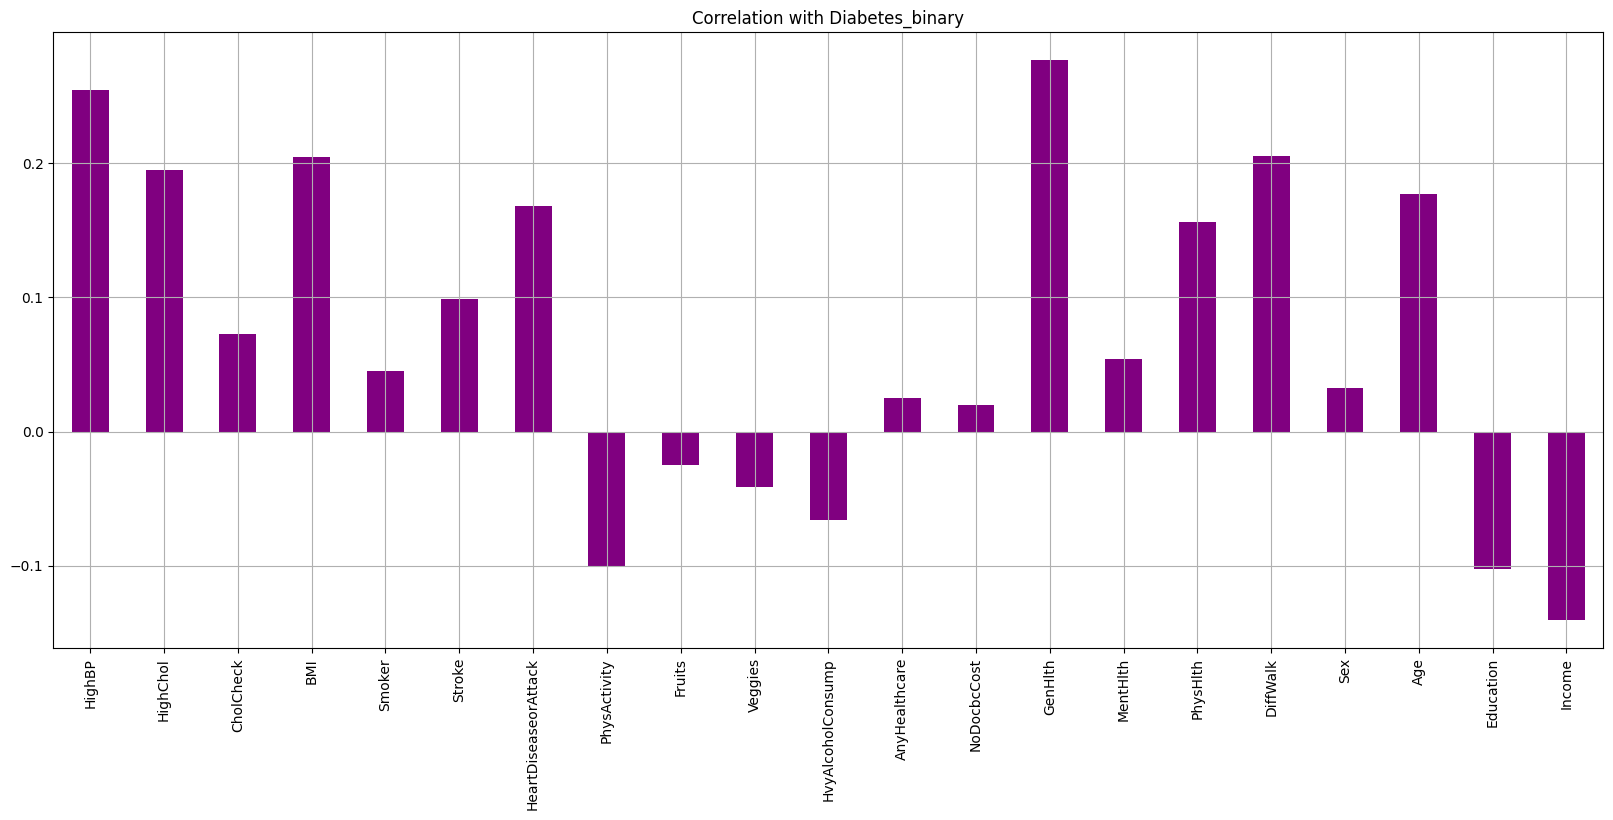

In [ ]:
data_dropped = diabetes1.drop('Diabetes_binary', axis=1)

# Ensure all remaining columns are numeric
numeric_data = data_dropped.select_dtypes(include=[np.number])

# Calculate correlation with 'Diabetes_binary'
correlation = numeric_data.corrwith(diabetes1.Diabetes_binary)

# Plot the correlation
correlation.plot(kind='bar', grid=True, figsize=(20, 8), title="Correlation with Diabetes_binary", color="Purple");

# Method for Determining Variable Significance Using Pearson Correlation Coefficients

In [ ]:
%%capture
from scipy.stats import pearsonr, spearmanr
for var in correlation.index:
    print(var, pearsonr(diabetes1[var], diabetes1['Diabetes_binary']))

# Bar Graph for 2x2 counts for the 3 datasets

**Figure 2: Counts of CholCheck and Diabetes_binary in Original, Undersampled, and Oversampled Datasets**

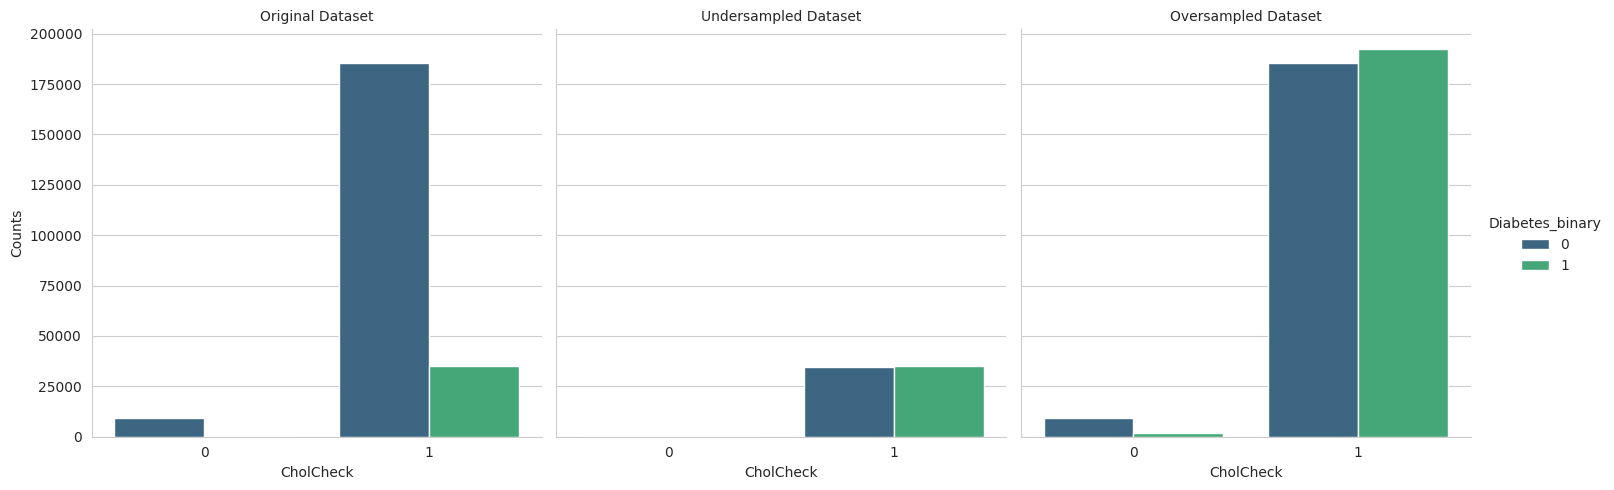

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data for the original, undersampled, and oversampled datasets
original_counts = pd.DataFrame({
    'CholCheck': [0, 0, 1, 1],
    'Diabetes_binary': [0, 1, 0, 1],
    'counts': [9057, 241, 185320, 34856],
    'dataset': 'Original'
})

undersampled_counts = pd.DataFrame({
    'CholCheck': [0, 0, 1, 1],
    'Diabetes_binary': [0, 1, 0, 1],
    'counts': [320, 241, 34777, 34856],
    'dataset': 'Undersampled'
})

oversampled_counts = pd.DataFrame({
    'CholCheck': [0, 0, 1, 1],
    'Diabetes_binary': [0, 1, 0, 1],
    'counts': [9057, 1856, 185320, 192521],
    'dataset': 'Oversampled'
})

# Concatenate all datasets into a single DataFrame
all_counts = pd.concat([original_counts, undersampled_counts, oversampled_counts])

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a bar plot
#plt.figure(figsize=(14, 8))
#sns.barplot(data=all_counts, x='CholCheck', y='counts', hue='Diabetes_binary', ci=None, palette='viridis', dodge=True)

# Adding titles and labels
#plt.title('Counts of CholCheck and Diabetes_binary in Original, Undersampled, and Oversampled Datasets', fontsize=16)
#plt.xlabel('CholCheck', fontsize=14)
#plt.ylabel('Counts', fontsize=14)
#plt.legend(title='Diabetes_binary', fontsize=12)
#plt.xticks([0, 1], ['CholCheck = 0', 'CholCheck = 1'])

# Facet the plot by dataset
g = sns.catplot(data=all_counts, x='CholCheck', y='counts', hue='Diabetes_binary', col='dataset', kind='bar', palette='viridis', height=5, aspect=1)
g.set_titles("{col_name} Dataset")
g.set_axis_labels("CholCheck", "Counts")
g.legend.set_title("Diabetes_binary")

# Show the plot
plt.show()

The second figure presents a bar graph comparing the counts of CholCheck and Diabetes_binary across three different datasets: the original dataset, an undersampled dataset, and an oversampled dataset. It's important to highlight that there are many ways to oversample or undersample, and we are evaluating specific methods, rather than all possible techniques.


*   **Original Dataset:** Displays the natural distribution of the data, highlighting a notable imbalance between individuals with and without diabetes.
*    **Undersampled Dataset:** Reduces the counts of individuals without diabetes to match those with diabetes, aiming for a balanced class distribution. However, this approach results in a significant reduction in total data and can weaken the relationship between CholCheck and diabetes.
*   **Oversampled Dataset:** The counts of individuals with diabetes are increased to match those without diabetes, achieving balance by adding synthetic samples. This method retains the original relationships within the data but can lead to overfitting if not handled properly.


These figures and the expanded findings underscore the importance of carefully choosing and understanding class imbalance techniques. By visualizing and analyzing these specific methods' impacts, we can build more accurate and robust models that better capture the relationships between variables, leading to improved insights and outcomes across various applications.

### Data preprocessing

We split the data into a training set and a testing set. This helps to ensure that we do not reward the models for overfitting to trends that are not shared in the test set. We also split the data into input and output variables.

In [ ]:
X = Original_diabetes.iloc[:,1:]
Y = Original_diabetes.iloc[:,0]

In [ ]:
columns = ["Diabetes_binary_str"]

In [ ]:
diabetes1.drop(columns , axis= 1 ,inplace=True)

In [ ]:
X=diabetes1.drop("Diabetes_binary",axis=1)
Y=diabetes1["Diabetes_binary"]

In [ ]:
X['Diabetes_binary'] = Y

In [ ]:
data_train , data_test = train_test_split(X, test_size=0.2 , random_state=42)

To make the continuous features comparable, values were standardized using `StandardScaler` from `sklearn.preprocessing`. This adjusted both the training and test data to have a mean of zero and a standard deviation of one, helping improve the performance of many machine learning algorithms.

In [ ]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
data_train.iloc[:, :-1] = scalar.fit_transform(data_train.iloc[:, :-1])
data_test.iloc[:, :-1] = scalar.transform(data_test.iloc[:, :-1])

### Importing tools for linear modeling

The code defines two functions: coefplot and metrics. The coefplot function takes in the results of an Ordinary Least Squares (OLS) regression model and generates a horizontal bar plot of the model's coefficients, excluding the intercept, with 95% confidence intervals. The function first processes the model summary to extract the coefficients and their confidence intervals, calculates the errors, and prepares the data for plotting. It then creates a plot using matplotlib and pandas, highlighting the coefficients and their confidence intervals, and saves the plot as a PDF file.

The metrics function, on the other hand, computes and returns several evaluation metrics for the OLS model: the Akaike Information Criterion (AIC), the log-likelihood function (LLF), the R-squared value, the mean absolute error (MAE) between the predicted and actual values of the target variable Diabetes_binary, and the F-statistic value. These metrics provide a quantitative assessment of the model's performance and fit.

In [ ]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

In [ ]:
def coefplot(results, subject):
    '''
    Takes in results of OLS model and returns a plot of
    the coefficients with 95% confidence intervals.

    Removes intercept, so if uncentered will return error.
    '''
    # Create dataframe of results summary
    coef_df = pd.DataFrame(results.summary().tables[1].data)

    # Add column names
    coef_df.columns = coef_df.iloc[0]

    # Drop the extra row with column labels
    coef_df=coef_df.drop(0)

    # Set index to variable names
    coef_df = coef_df.set_index(coef_df.columns[0])

    # Change datatype from object to float
    coef_df = coef_df.astype(float)

    # Get errors; (coef - lower bound of conf interval)
    errors = coef_df['coef'] - coef_df['[0.025']

    # Append errors column to dataframe
    coef_df['errors'] = errors

    # Drop the constant for plotting
    coef_df = coef_df.drop(['Intercept'])

    # Sort values by coef ascending
    #coef_df = coef_df.sort_values(by=['coef'])

    ### Plot Coefficients ###

    # x-labels
    variables = list(coef_df.index.values)

    # Add variables column to dataframe
    coef_df['variables'] = variables

    # Set sns plot style back to 'poster'
    # This will make bars wide on plot
    #sns.set_context("poster")

    # Define figure, axes, and plot
    fig, ax = plt.subplots(figsize=(15, 10))

    # Error bars for 95% confidence interval
    # Can increase capsize to add whiskers
    coef_df.plot(x='variables', y='coef', kind='barh',
                 ax=ax, color='none',
                 ecolor='steelblue',capsize=0,
                 xerr='errors', legend=False)

    # Set title & labels
    plt.title('Coefficients for '+subject+' model w/ 95% CIs')
    ax.set_ylabel('Coefficients')
    ax.set_xlabel('')

    # Coefficients
    ax.scatter(y=np.arange(coef_df.shape[0]),
               marker='o', s=80,
               x=coef_df['coef'], color='steelblue')

    # Line to define zero on the y-axis
    ax.axvline(x=0, linestyle='--', color='red', linewidth=1)

    plt.tight_layout()
    plt.savefig(subject+"_coefplot.pdf")

    return None

In [ ]:
def metrics(mod):
  return np.round(mod.aic), np.round(mod.llf), np.round(mod.rsquared, 3), np.round(np.mean(np.abs(data_test['Diabetes_binary'] - mod.predict(data_test))), 3), np.round(mod.fvalue)

### Defining and fitting linear model

In [ ]:
depvar = "Diabetes_binary"
features = data_train.columns[:-1]

In [ ]:
mod1 = smf.ols(formula=depvar + ' ~ ' + "+".join(features), data=data_train)
mod1 = mod1.fit()

# Function for Processing and Analyzing Dataset with Linear Regression Using Statsmodels

This function processes the given dataset by splitting it into training and testing sets, standardizing the feature variables, and fitting a linear regression model using the statsmodels library. The function returns the fitted linear model, which can be used to analyze the relationship between the features and the target variable Diabetes_binary.

In [ ]:
def generate_linear_model(dataset):
    # reorder the data so that the target variable is at the far right
    X = dataset.drop(columns=["Diabetes_binary"])
    Y = dataset["Diabetes_binary"]
    X["Diabetes_binary"] = Y

    # Split the data into training and testing sets
    data_train, data_test = train_test_split(X, test_size=0.2, random_state=42)

    # Standardize the feature variables (excluding the target variable)
    scaler = StandardScaler()
    data_train.iloc[:, :-1] = scaler.fit_transform(data_train.iloc[:, :-1])
    data_test.iloc[:, :-1] = scaler.transform(data_test.iloc[:, :-1])

    # Define the dependent variable and feature variables for the model
    depvar = "Diabetes_binary"
    features = data_train.columns[:-1]  # Exclude the dependent variable from features

    # Fit the linear model using statsmodels
    formula = depvar + ' ~ ' + " + ".join(features)
    mod1 = smf.ols(formula=formula, data=data_train).fit()

    return mod1

# 3 Coefficient Plots (Original, Undersampled, Oversampled)

**Analyzing the Data: Original Model**

We'll start with an initial model trained on the imbalanced dataset. The following figure shows the coefficients for various predictors of diabetes, with their 95% confidence intervals:

In [ ]:
original_mod = generate_linear_model(diabetes1)

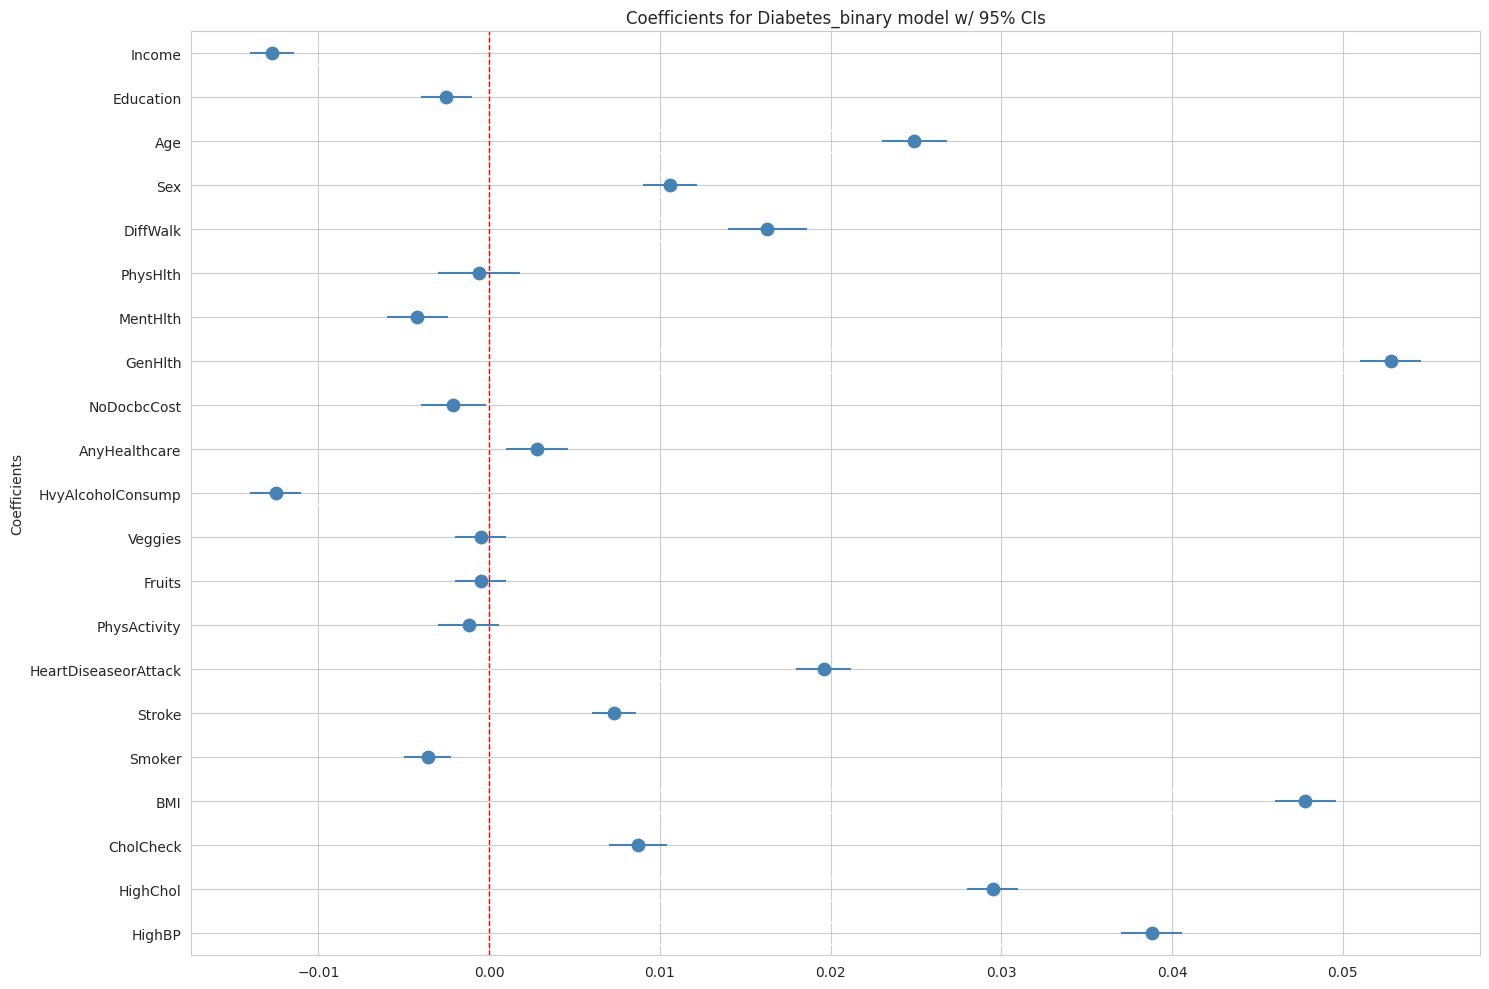

In [ ]:
coefplot(original_mod, depvar)


In this initial model, we can see the coefficients for each predictor variable related to diabetes. These coefficients represent the impact of each variable on the likelihood of a patient having diabetes. The horizontal lines through the points represent the 95% confidence intervals for these coefficients. If a confidence interval crosses the red vertical line at zero, it means that the variable is not a statistically significant predictor of diabetes.

In this case, some variables like Income, Education, and BMI show a significant relationship with diabetes, while others like Veggies (Does the patient eat vegetables?) do not appear to be significant. However, as we will see, various data balancing methods could result in categorically different determinations about the significance and direction of these predictor coefficients.


**Undersampling: Reducing the Majority Class**

To address the class imbalance, we first try undersampling. This technique involves randomly reducing the number of instances in the majority class to match the minority class. Here's how the model coefficients look after undersampling:

In [ ]:
undersample_mod = generate_linear_model(diabetes2)

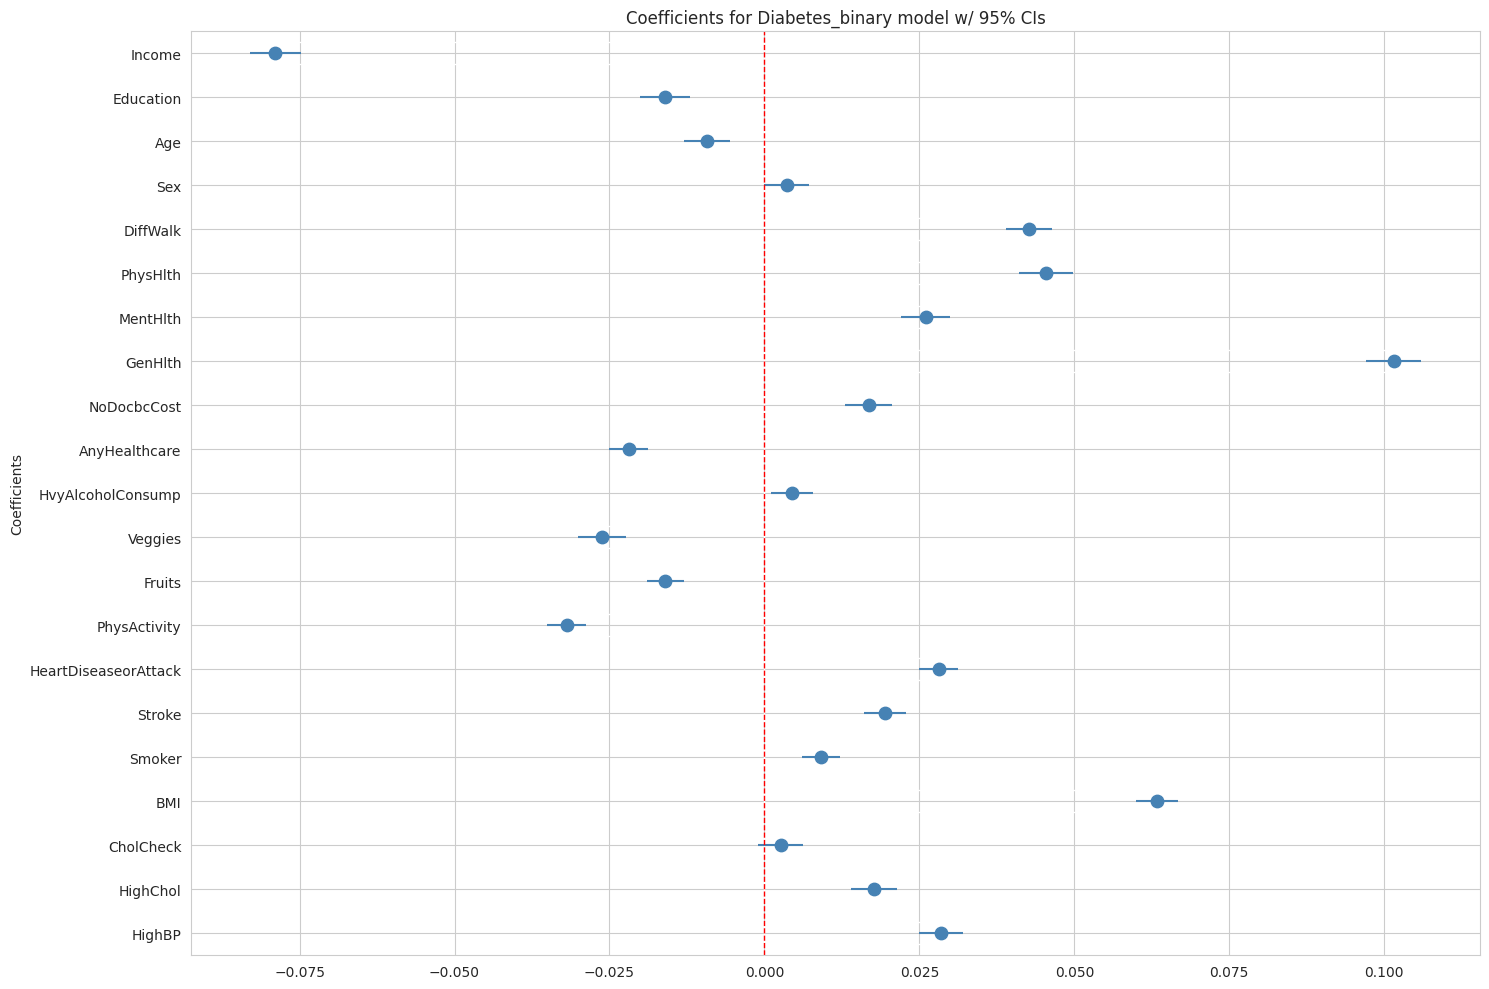

In [ ]:
coefplot(undersample_mod, depvar)

After undersampling, we see a shift in the significance of some predictors. Variables like Income and Education still show a strong relationship with diabetes, but other variables like PhysActivity (Physical Activity) and GenHlth (General Health) appear to have gained significance.

However, CholCheck still does not appear to be a significant predictor. This suggests that undersampling, while balancing the dataset, can sometimes weaken the relationship between certain predictors and the outcome variable because it reduces the overall amount of data available to the model. This can lead to a less robust understanding of the predictors.

**Oversampling: Increasing the Minority Class**

Next, we try oversampling, where we randomly duplicate instances in the minority class to balance the dataset. The following figure shows the model coefficients after oversampling:


In [ ]:
oversample_mod = generate_linear_model(diabetes3)

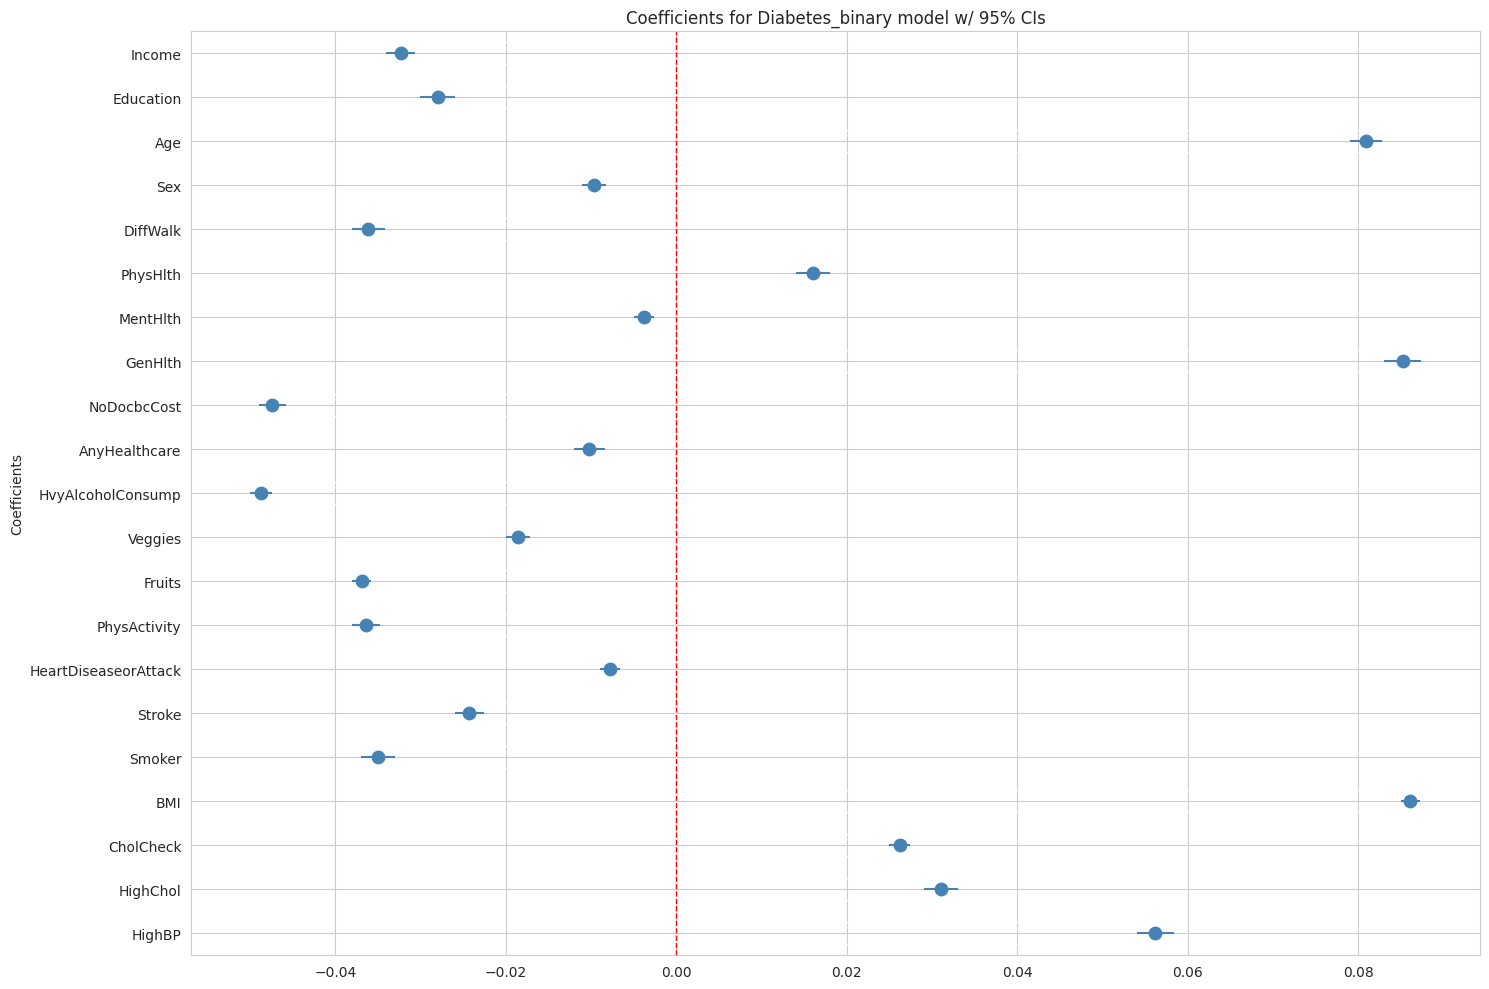

In [ ]:
coefplot(oversample_mod, depvar)

With oversampling, the dataset becomes balanced by increasing the number of instances in the minority class. This technique helps the model better recognize the importance of predictors related to diabetes. In this model, variables like Income, Education, and BMI remain significant, and importantly, CholCheck now also appears to be a significant predictor of diabetes.

This change indicates that oversampling has enhanced the model's ability to understand the relationships in the data by providing more instances of the minority class. Consequently, the model becomes more accurate and reliable, especially when dealing with imbalanced datasets. Additionally, we observed that the process of dropping and re-adding data positions the target variable more accurately, and the confidence intervals on the oversampled data are all smaller, reflecting increased precision in the model’s estimates.

# Conclusion

**Implications of Undersampling and Oversampling on Results**


Undersampling and oversampling are techniques used to address class imbalance in datasets.

Undersampling reduces the majority class to balance it with the minority class. While this can lead to a more balanced dataset, it often results in a loss of valuable information and weakened relationships between variables. One common undersampling technique is NearMiss. NearMiss balances class distribution by eliminating majority class examples. Specifically, it removes instances of the majority class that are closest to the minority class. The method selects which data points to delete based on their distance to the minority class instances, aiming to increase the space between the two classes and thereby enhance the classification process. However, this can sometimes result in a weakened relationship between predictors and the outcome variable, as seen in our analysis where the relationship between CholCheck and diabetes was significantly weakened.

Oversampling, on the other hand, increases the minority class by generating synthetic samples, thereby retaining the original data's information and relationships. This technique can help address class imbalance without losing data, though it may lead to overfitting or introduce noise if not managed carefully. In our analysis, the SMOTE (Synthetic Minority Over-sampling Technique) method was used. SMOTE preserves relationships between variables, such as CholCheck and diabetes, by creating new synthetic examples for the minority class. Unlike simple replication of existing examples, SMOTE generates new data points by combining similar instances. It achieves this by selecting one or more of the nearest neighbors of a minority example and creating new points between them.

In the analysis, we observed that undersampling significantly weakened the relationship between CholCheck and diabetes, while oversampling preserved this relationship, highlighting the importance of choosing the appropriate method based on the specific characteristics of the dataset and the goals of the analysis.

**Considerations and Challenges in Undersampling and Oversampling Methods**

Through these figures, we can see how undersampling and oversampling affect the significance of predictors in a machine learning model. Undersampling can sometimes weaken relationships, while oversampling helps highlight important predictors by balancing the dataset. Understanding these techniques is crucial for building robust models, especially when dealing with imbalanced data.

Our findings reveal that undersampling, such as the NearMiss technique, can lead to a loss of valuable information, weakening the relationships between key variables like CholCheck and diabetes. This reduction in data can result in models that fail to capture the true significance of certain predictors, potentially leading to less accurate predictions and insights.

On the other hand, oversampling with SMOTE preserves the original data's information and relationships. By generating synthetic samples for the minority class, SMOTE maintains the integrity of important predictors. This helps in constructing models that are more reflective of the actual data distribution, resulting in better performance and more reliable insights.

For future data researchers and students, these findings underscore the importance of choosing the right technique for handling class imbalance. Here are some key takeaways:

1. **Informed Decision-Making:** Understanding the impact of different sampling methods allows researchers to make more informed decisions about which technique to use based on their dataset's characteristics and analysis goals.

2. **Model Accuracy:** By selecting appropriate imbalance techniques, researchers can build more accurate models that better capture the relationships between variables. This is especially important in fields like healthcare, where accurate predictions can have significant implications.

3. **Enhanced Learning:** For students, grasping these concepts is fundamental to becoming proficient in data science. Knowing how and when to apply undersampling and oversampling techniques equips them with the skills needed to tackle real-world data challenges effectively.

4. **Practical Applications:** These insights can be applied across various domains, from healthcare to finance to marketing. For example, in healthcare, accurately identifying risk factors for diseases like diabetes can lead to better preventive measures and treatments.

5. **Continuous Improvement:** As data science evolves, new techniques and methodologies will emerge. Understanding the current methods provides a solid foundation for learning and adapting to future advancements in the field.

By exploring these methods, we can make more informed decisions and improve the performance of our models, ultimately leading to better insights and outcomes in various fields. Emphasizing the importance of these techniques ensures that future data researchers and students are well-prepared to handle the complexities of imbalanced data and leverage it effectively for impactful results.